In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs,load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import copy

# Loading and plotting data
We use makeblobs for getting classification datasets. make_blobs is just a way to get some data for training models on fake data.
We then plot our data . It allows us to choose a fitted algo for training our model.

(300, 2) (300, 1)


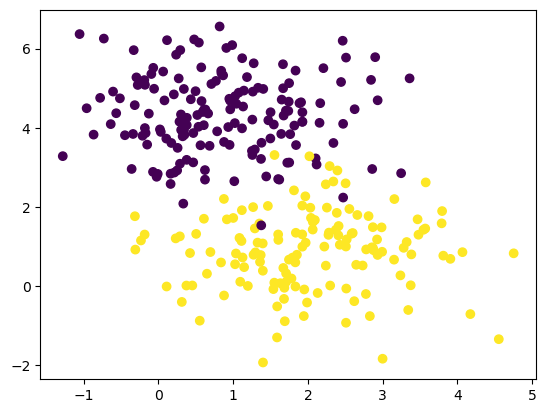

In [339]:
X,y = make_blobs(n_samples=400,n_features=2,centers=2,random_state=0)

#Reshape y for avoiding broadcast error
y = y.reshape((-1,1))


#Splitting data in train and test split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

print(X_train.shape,y_train.shape)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)

# Initialize
We initialize parameters θ. I choose to merge weight W and biais b for simplify the training. We could also work with W and b; I think it is easier to handle θ.

In [330]:
W = np.random.randn(X.shape[1],1)
b = np.random.randn(1)

# Logistic Regression function
Like with linear function,we work with function in logistic Regression. The model of Logistic Regression is just a function f 
whose formula is the following:
    $$ f_{\mathbf{w},b}(x) = g(\mathbf{w}\cdot \mathbf{x} + b)$$

where g is the sigmoid. Sigmoid function is widely used because its value are between 0 and 1. We can then interpret its output as a probability.

    
The formula of Sigmoid:
$$g(z) = \frac{1}{1+e^{-z}}$$


In [133]:
def model(X,W,b):
    Z = X.dot(W) + b
    A = 1 / (1+np.exp(-Z))
    return A

# Cost function
Our model makes some errors. We need to compute these errors for minimizing them. 
For each data point ,we can get  the loss with the following formula:
 $$loss(f_{\mathbf{W},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{W},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{W},b}\left( \mathbf{x}^{(i)} \right) \right) $$
Where $f_{\mathbf{w},b} $ is the prediction  and  $y^{(i)}$ is the real value 
 

Like in linear regression ,we will sum all errors or losses for getting the total cost:

$$ J(\mathbf{W},b) = \frac{1}{m}\sum_{i=1}^{m} \left[ loss(f_{\mathbf{W},b}(X), y) \right] $$
where m is the number of training examples in the dataset

In [214]:
def log_loss(X,y,A):
    loss  = - (y*np.log(A)+(1-y)*np.log(1-A))
    return np.sum(loss)



The gradient formula in logistic regression is quite similar to linear regression:
$$
\frac{\partial J(\mathbf{W},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (A - y) 
$$
Where $A$ is the probability compute in the sigmoid function
$$
\frac{\partial J(\mathbf{W},b)}{\partial W}  = \frac{1}{m} \sum\limits_{i = 1}^{m} X.T(A-y)
$$

In [215]:
def gradient(X,y,A):
    residual = A - y
    dW = 1/len(y) * np.dot(X.T,residual)
    db = 1/len(y) * np.sum(residual)
    return dW,db

# Update

## Now we can train our model

In [331]:
def gradient_descent(X,y,W_in,b_in,n_iterations=500,lr=0.05):
    W= copy.deepcopy(W_in)
    b = copy.deepcopy(b_in)
    

    loss_history = np.zeros(n_iterations)
    for epoch in range(n_iterations):
        A = model(X,W,b)
        loss_history[epoch] = log_loss(X,y,A)
        
        dW,db = gradient(X,y,A)
        W = W - lr * dW
        b = b - lr * db

        
        if epoch%20== 0:
            print(f'Etape {epoch} atteint. L"erreur est de {log_loss(X,y,A)}')

    return W,b,loss_history

## We can get optimal parameter after the training

In [332]:
W,b,loss_history = gradient_descent(X_train,y_train,W,b,lr=0.05)
#print(dW,db)


Etape 0 atteint. L"erreur est de 475.90803266696116
Etape 20 atteint. L"erreur est de 251.1845881205278
Etape 40 atteint. L"erreur est de 139.95616638261257
Etape 60 atteint. L"erreur est de 100.13093795636576
Etape 80 atteint. L"erreur est de 82.45262815871666
Etape 100 atteint. L"erreur est de 72.61388833713623
Etape 120 atteint. L"erreur est de 66.32797569684602
Etape 140 atteint. L"erreur est de 61.94145814858157
Etape 160 atteint. L"erreur est de 58.68905824258248
Etape 180 atteint. L"erreur est de 56.16881556148014
Etape 200 atteint. L"erreur est de 54.14936314630329
Etape 220 atteint. L"erreur est de 52.48801539976661
Etape 240 atteint. L"erreur est de 51.091918462386175
Etape 260 atteint. L"erreur est de 49.89799165854302
Etape 280 atteint. L"erreur est de 48.86184691421558
Etape 300 atteint. L"erreur est de 47.95132139124679
Etape 320 atteint. L"erreur est de 47.14252628886425
Etape 340 atteint. L"erreur est de 46.41733810633127
Etape 360 atteint. L"erreur est de 45.7617524808

Text(0, 0.5, 'Loss')

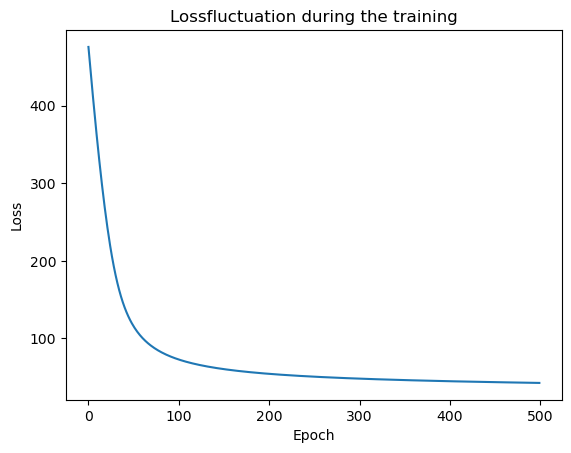

In [333]:
plt.plot(range(loss_history.shape[0]),loss_history)
plt.title('Lossfluctuation during the training')
plt.xlabel('Epoch')
plt.ylabel('Loss')

## Let's predict

0.93


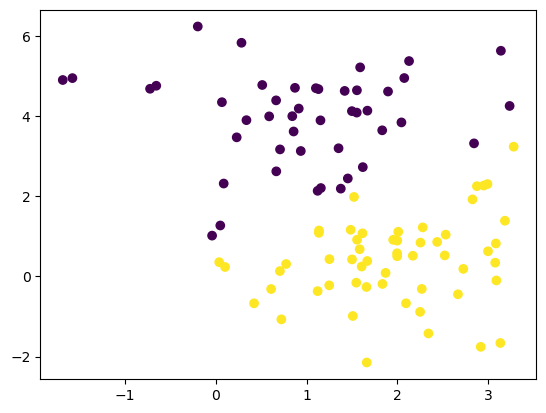

In [340]:
y_predict = X_test.dot(W) + b
y_predict = (y_predict >=0.5).astype(int)
acc = accuracy_score(y_test,y_predict)
print(acc)
plt.scatter(X_test[:,0],X_test[:,1],c=y_predict)

0.93
